# -*-*-Bank Loan Approval Prediction using Machine Learning-*-*-

Problem: Bank wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.The idea behind this ML project is to build an ML model and web application that the bank can use to classify if a user can be granted a loan or not.



### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import classification_report, plot_confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score,cross_val_predict
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Reading and Understanding the Data

In [2]:
#Reading csv file of train data
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [4]:
loan_data = loan_data.drop(columns=['Unnamed: 0']) ## Dropping unnamed column 
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [5]:
loan_data.shape

(491, 13)

In [6]:
#Reading csv file of test data 
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...
118,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban
119,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural
120,LP002757,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban
121,LP002582,Female,No,0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [8]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [9]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

From above observations, We can see there are total 13 columns including target variable in train data, all of them are self explanatory. We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns. 

In [10]:
## Dropping Loan ID which is not needed
loan_data = loan_data.drop(columns=['Loan_ID'])  
#Count number of Categorical and Numerical Columns and grouping them in separate dataframes
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Exploratory Data Analysis & Data Preprocessing 

#### Univariate Analysis 

Checking Count values of Taret variable 'Loan_Status'

In [11]:
loan_data['Loan_Status'].value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [12]:
#Normalize can be set to True to print proportions instead of number
loan_data['Loan_Status'].value_counts(normalize=True) 

1    0.698574
0    0.301426
Name: Loan_Status, dtype: float64

<AxesSubplot:>

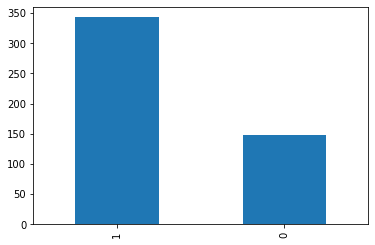

In [13]:
loan_data['Loan_Status'].value_counts().plot.bar()

The loan of 343(around 69%) people out of 491 were approved and 148( around 30%) were not approved

In [14]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Some variables have missing values that we’ll have to deal with , and also there seems to be some outliers for the Applicant Income , Coapplicant income and Loan Amount . We also see that about 84% applicants have a credit_history. Because the mean of Credit_History field is 0.84 and it has either (1 for having a credit history or 0 for not)

Lets Visualize Independent Categorical Variables 

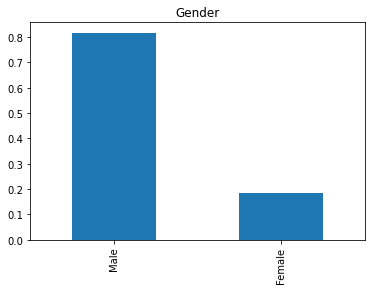

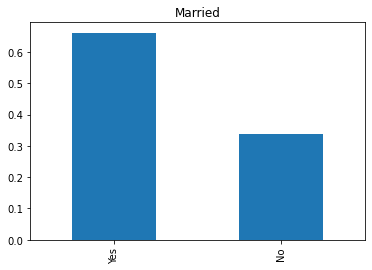

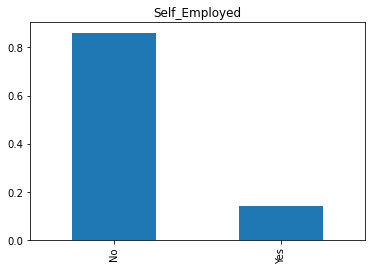

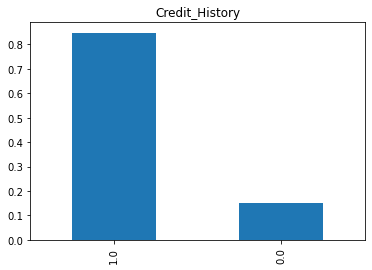

In [15]:
loan_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
loan_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
loan_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
loan_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

     It can be inferred from the above bar plots that:
    1)80% majority of applicants in the dataset are male 
    2)Around 65% of the applicants in the dataset are married.
    3)Around 15% of applicants in the dataset are self-employed.
    4)Around 85% of applicants have repaid their debts.

Lets Visualize Independent Ordinal Variable 

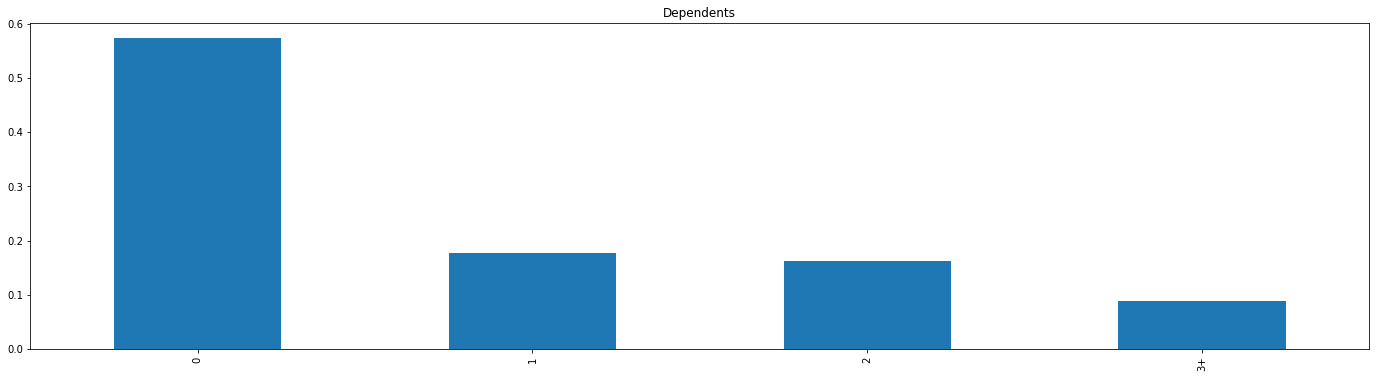

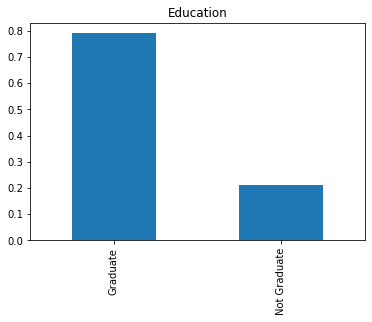

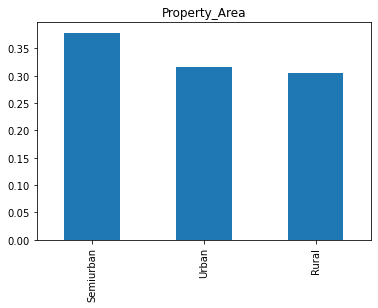

In [16]:
loan_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
loan_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
loan_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

    The following inferences can be made from the above bar plots:
    1)Majority of around 58% of the applicants don't have any dependents
    2)Around 80% of the applicants are Graduate.
    3)Most of the applicants are from the Semiurban area.

 Now, let's also analyze Numerical Columns:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       491.000000         491.000000  475.000000
mean       5401.189409        1589.730998  145.014737
std        6419.427177        2919.320624   86.310534
min         150.000000           0.000000   17.000000
25%        2923.500000           0.000000  100.000000
50%        3865.000000        1229.000000  126.000000
75%        5705.500000        2251.500000  162.000000
max       81000.000000       41667.000000  700.000000


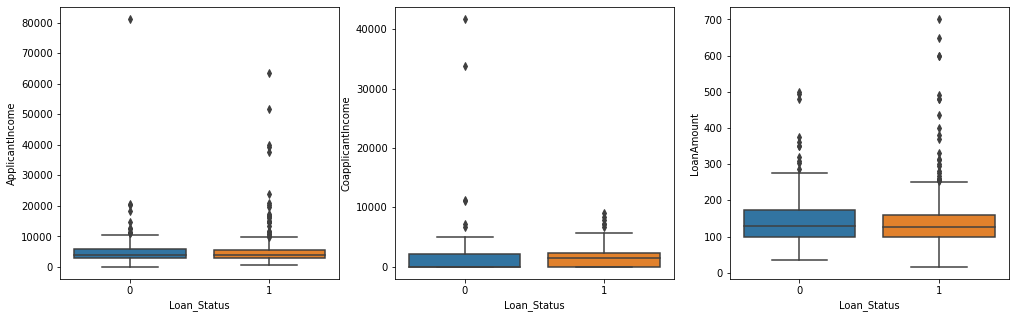

In [17]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan_data,x='Loan_Status',ax=axes[idx])

print(loan_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

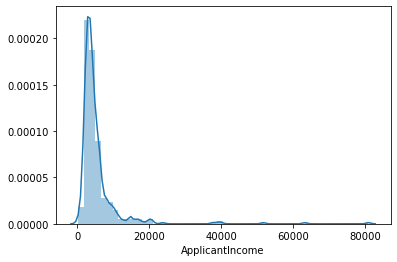

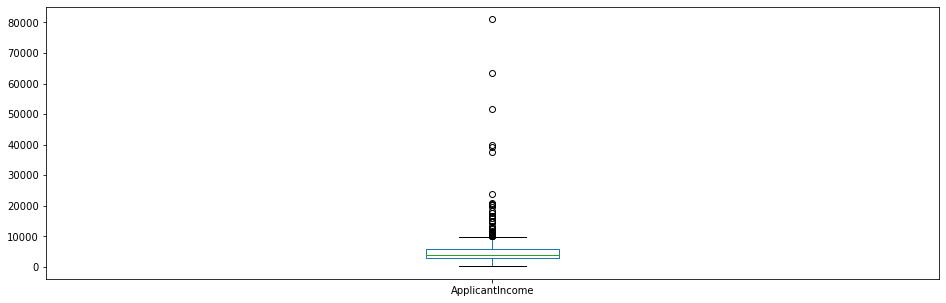

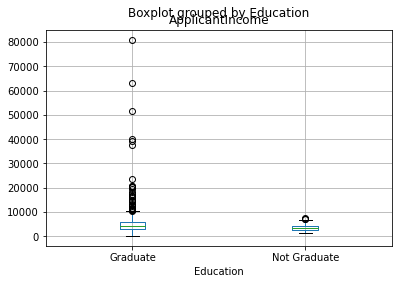

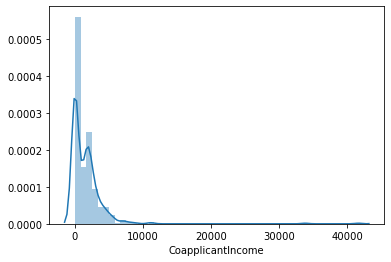

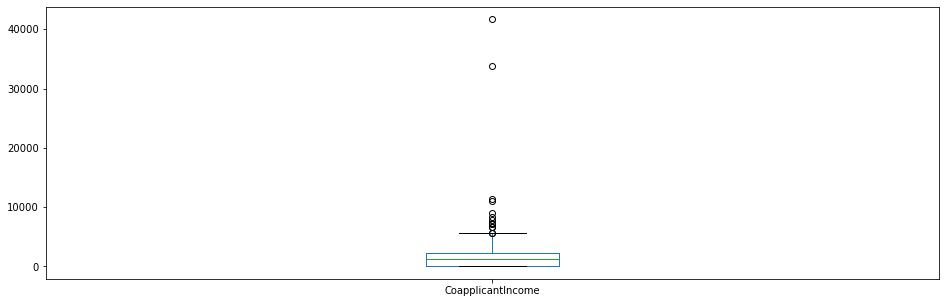

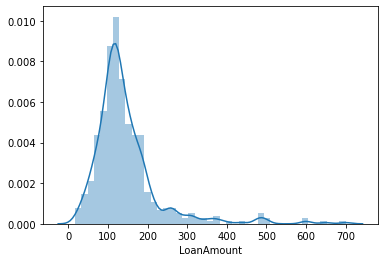

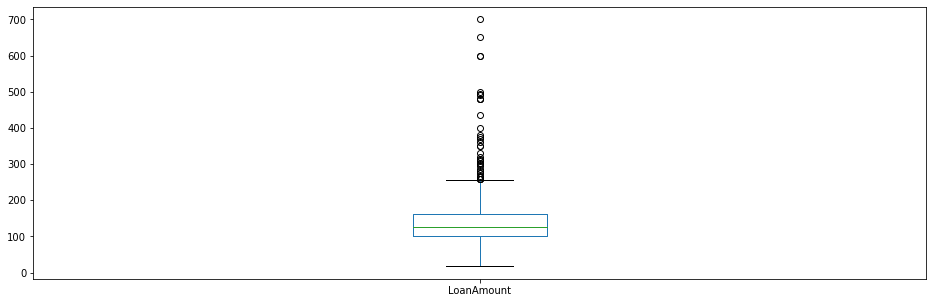

In [18]:
#Distribution and Box Plot for ApplicantIncome
sns.distplot(loan_data['ApplicantIncome'])
plt.show()
loan_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

loan_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.show() 

#Distribution and Box Plot for CoapplicantIncome
sns.distplot(loan_data['CoapplicantIncome'])
plt.show()
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

#Distribution and Box Plot for LoanAmount
loan_data.notna()
sns.distplot(loan_data['LoanAmount'])
plt.show()
loan_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()


From above distribution and Boxplot for 3 numerical variables it can be infered that: 

1)ApplicantIncome: Applicantdata in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed and the boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. So after segregating them by Education we observed that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

2)CoapplicantIncome: We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

3)LoanAmount: We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers later.

#### Bivariate Analysis

    Let’s recall some of the hypotheses that we generated earlier:
    -Applicants with high incomes should have more chances of loan approval.
    -Applicants who have repaid their previous debts should have higher chances of loan approval.
    -Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
    -Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
    Let’s try to test the above-mentioned hypotheses using bivariate analysis.

Lets Explore all Categorical Data distribution with respect to Target variable 'Loan_Status'

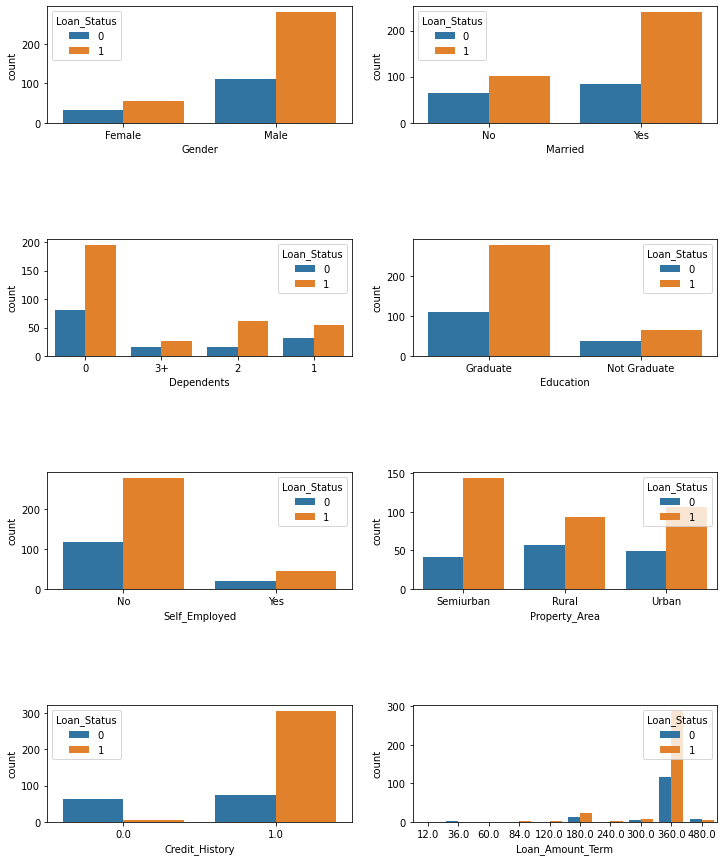

In [19]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

**Plots above convey following things about the data:**

1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men than Women (approx. 3x) and also more loans were approved for men compared to women.
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher proportion of loan approval
6. Employment: 5/6th of population is not self employed and they also have high proportion of loan approval  
7. Property Area: More applicants from Semi-urban and also likely to be granted loans compared to Rural and Urban Areas.
8. Applicant with credit history are far more likely to be accepted for loan.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).


Lets Explore all Numerical Data distribution with respect to Target variable 'Loan_Status'

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

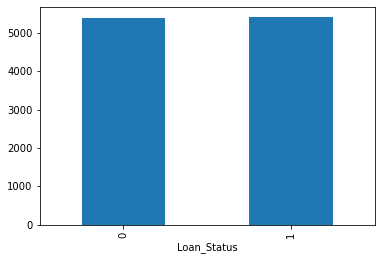

In [20]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

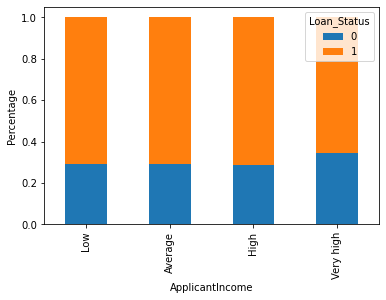

In [21]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

We will analyze the co-applicant income and loan amount variable in a similar manner.

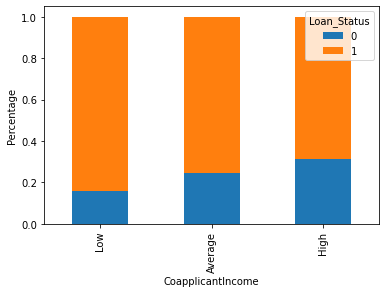

In [22]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['Coapplicant_Income_bin']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

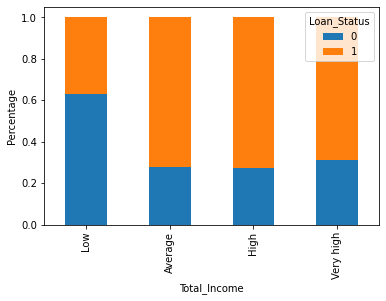

In [23]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Total_Income_bin']=pd.cut(loan_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_data['Total_Income_bin'],loan_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

Done with Exploration part and now Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.

In [24]:
loan_data=loan_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
loan_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

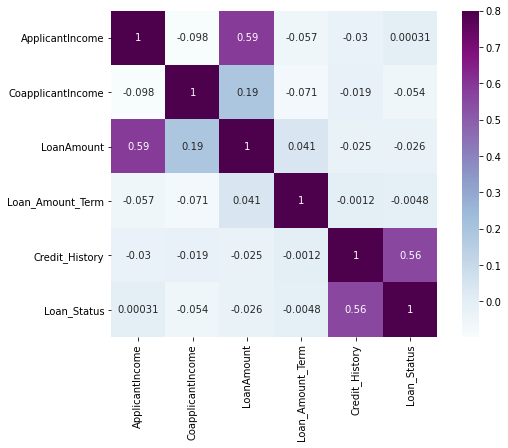

In [25]:
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

From the above correlation plot, We observe that the most correlate variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

#### Missing value imputation

Let’s list out feature-wise count of missing values.

In [26]:
loan_data.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

    There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.
    We will treat the missing values in all the features one by one.
    We can consider these methods to fill the missing values:
    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [27]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [28]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
36.0       2
60.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in the loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [29]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [30]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

Now let's check whether all the missing values are filled in the dataset.

In [31]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [32]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

#### Outlier Treatment


As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to normal distribution.
Let’s visualize the effect of log transformation. We will do similar changes to the test file simultaneously.

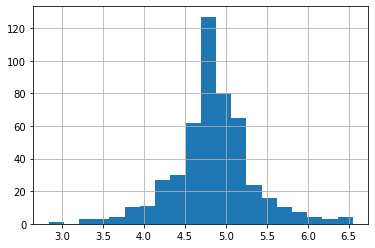

In [33]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])


Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

Let's drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we already did for the training dataset.

In [34]:
test_data=test_data.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efcient tools which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [35]:
X = loan_data.drop('Loan_Status',1)
y = loan_data.Loan_Status

Now we will make dummy variables for the categorical variables. The dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare.

In [36]:
X = pd.get_dummies(X)
loan_data=pd.get_dummies(loan_data)
test_data=pd.get_dummies(test_data)

In [37]:
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size=0.3)

In [38]:
x_train.shape

(343, 21)

In [39]:
x_val.shape

(148, 21)

In [40]:
y_train.shape

(343,)

In [41]:
y_val.shape

(148,)

### Model Building 

#### 1.1 Logistic Regression

In [42]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [43]:
pred_val = LR_model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8108108108108109

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.
Let’s make predictions for the test dataset.

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        44
           1       0.80      0.98      0.88       104

    accuracy                           0.81       148
   macro avg       0.85      0.69      0.72       148
weighted avg       0.83      0.81      0.79       148

0.8793103448275861


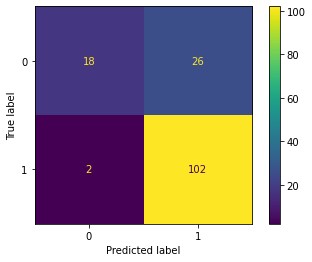

In [44]:
plot_confusion_matrix(LR_model, x_val, y_val)
print(classification_report(y_val, LR_model.predict(x_val)))
print(f1_score(y_val, LR_model.predict(x_val)))

#### Logistic Regression using stratified k-folds cross-validation

In [45]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 LR_kcv_model = LogisticRegression(random_state=1)
 LR_kcv_model.fit(xtr,ytr)
 pred_test=LR_kcv_model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = LR_kcv_model.predict(test_data)
 pred = LR_kcv_model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 


C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.8181818181818182

2 of kfold 5 
accuracy_score 0.7551020408163265

3 of kfold 5 
accuracy_score 0.7551020408163265

4 of kfold 5 
accuracy_score 0.826530612244898

5 of kfold 5 
accuracy_score 0.7959183673469388

 Mean Validation Accuracy 0.7901669758812615


C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

The mean validation accuracy for this model turns out to be 0.80.

In [46]:
print(classification_report(yvl, LR_kcv_model.predict(xvl)))
print(f1_score(yvl, LR_kcv_model.predict(xvl)))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        30
           1       0.79      0.97      0.87        68

    accuracy                           0.80        98
   macro avg       0.82      0.69      0.71        98
weighted avg       0.81      0.80      0.77        98

0.8684210526315789


In [47]:
LR_res = pd.DataFrame(pred_test) 
LR_res.index = test_data.index
LR_res.columns = ["prediction"]
LR_res.to_csv("prediction_results.csv", index = False)      

In [48]:
def model_check(models, x_train, y_train):
    for name, model in models.items():
        score = cross_val_score(model, x_train, y_train, cv=3, scoring='f1', n_jobs=-1)
        print(f'{name} F1 score : {np.mean(score)}')

models = {'logistic_reg':LogisticRegression(),
        'random_forest':RandomForestClassifier(), 
          'XGB':XGBClassifier(), 
         'Decision_Tree':DecisionTreeClassifier()}


In [49]:
model_check(models, x_train, y_train)

logistic_reg F1 score : 0.8752410618303491
random_forest F1 score : 0.8428618450203187
XGB F1 score : 0.8552048726467332
Decision_Tree F1 score : 0.7703351339729636


We can see Logistic_regression model has high F-1 score 

#### Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

1. Total Income — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.

2. EMI — EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.

3. Balance Income — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [50]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']

Let’s check the distribution of Total Income.

<AxesSubplot:xlabel='Total_Income'>

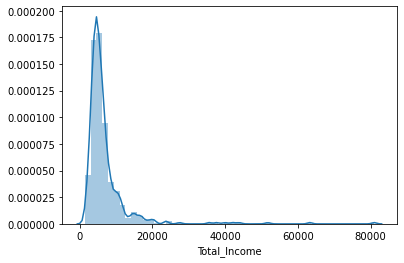

In [51]:
sns.distplot(loan_data['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

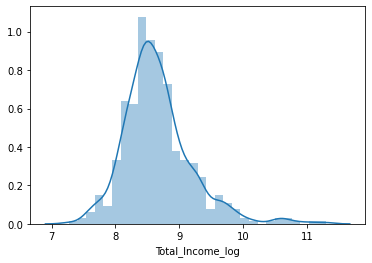

In [52]:
loan_data['Total_Income_log'] = np.log(loan_data['Total_Income'])
sns.distplot(loan_data['Total_Income_log'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

 Let’s create the EMI feature now.

In [53]:
loan_data['EMI']=loan_data['LoanAmount']/loan_data['Loan_Amount_Term']
test_data['EMI']=test_data['LoanAmount']/test_data['Loan_Amount_Term']

Let’s check the distribution of the EMI variable.

<AxesSubplot:xlabel='EMI'>

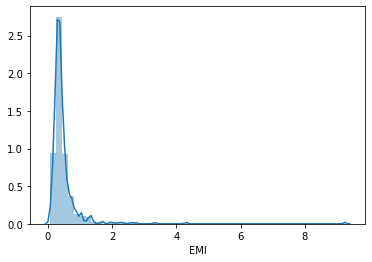

In [54]:
sns.distplot(loan_data['EMI'])

 Let's create the Balance_Income feature now.

<AxesSubplot:xlabel='Balance Income'>

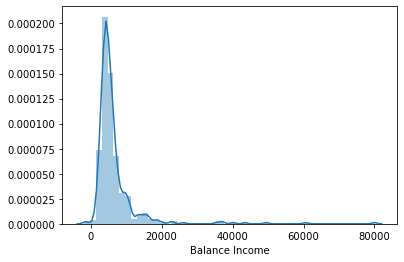

In [55]:
loan_data['Balance Income'] = loan_data['Total_Income']-(loan_data['EMI']*1000)
test_data['Balance Income'] = test_data['Total_Income']-(test_data['EMI']*1000)
sns.distplot(loan_data['Balance Income'])

Let us now drop the variables which we used to create these new features. The reason for doing this is, the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [56]:
loan_data=loan_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_data=test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [57]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           491 non-null    float64
 1   Loan_Status              491 non-null    int64  
 2   LoanAmount_log           491 non-null    float64
 3   Gender_Female            491 non-null    uint8  
 4   Gender_Male              491 non-null    uint8  
 5   Married_No               491 non-null    uint8  
 6   Married_Yes              491 non-null    uint8  
 7   Dependents_3             491 non-null    uint8  
 8   Dependents_0             491 non-null    uint8  
 9   Dependents_1             491 non-null    uint8  
 10  Dependents_2             491 non-null    uint8  
 11  Education_Graduate       491 non-null    uint8  
 12  Education_Not Graduate   491 non-null    uint8  
 13  Self_Employed_No         491 non-null    uint8  
 14  Self_Employed_Yes        4

After creating new features, we can continue the model building process. So we will start with the logistic regression model and then move over to more complex models like RandomForest and XGBoost.

Let’s prepare the updated data for feeding into the models.

In [58]:
X = loan_data.drop('Loan_Status',1)
y = loan_data.Loan_Status

#### 1.2 Logistic Regression

In [59]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 newLRmodel = LogisticRegression(random_state=1)
 newLRmodel.fit(xtr,ytr)
 pred_test=newLRmodel.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = newLRmodel.predict(test_data)
 pred = newLRmodel.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7878787878787878

2 of kfold 5 
accuracy_score 0.8061224489795918

3 of kfold 5 
accuracy_score 0.8469387755102041

4 of kfold 5 
accuracy_score 0.8163265306122449

5 of kfold 5 
accuracy_score 0.7551020408163265

 Mean Validation Accuracy 0.802473716759431


C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

In [60]:
print(classification_report(yvl, newLRmodel.predict(xvl)))
print(f1_score(yvl, newLRmodel.predict(xvl)))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        30
           1       0.78      0.91      0.84        68

    accuracy                           0.76        98
   macro avg       0.72      0.66      0.67        98
weighted avg       0.74      0.76      0.73        98

0.8378378378378379


The mean validation accuracy for this model turns out to be 0.80.

In [61]:
newLR_res = pd.DataFrame(pred_test) 
newLR_res.index = test_data.index
newLR_res.columns = ["prediction"]
newLR_res.to_csv("newLR_prediction_results.csv", index = False)      

#### 2. Decision Tree

In [62]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    DT_model = tree.DecisionTreeClassifier(random_state=1)
    DT_model.fit(xtr,ytr)
    pred_test=DT_model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = DT_model.predict(test_data)
    pred = DT_model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7070707070707071

2 of kfold 5 
accuracy_score 0.6836734693877551

3 of kfold 5 
accuracy_score 0.7346938775510204

4 of kfold 5 
accuracy_score 0.7448979591836735

5 of kfold 5 
accuracy_score 0.6224489795918368

 Mean Validation Accuracy 0.6985569985569986


In [63]:
print(classification_report(yvl, DT_model.predict(xvl)))
print(f1_score(yvl, DT_model.predict(xvl)))

              precision    recall  f1-score   support

           0       0.40      0.47      0.43        30
           1       0.75      0.69      0.72        68

    accuracy                           0.62        98
   macro avg       0.57      0.58      0.57        98
weighted avg       0.64      0.62      0.63        98

0.717557251908397


#### 3. Random Forest 

In [64]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 RF_model = RandomForestClassifier(random_state=1, max_depth=10)
 RF_model.fit(xtr,ytr)
 pred_test=RF_model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = RF_model.predict(test_data)
 pred = RF_model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8080808080808081

2 of kfold 5 
accuracy_score 0.7959183673469388

3 of kfold 5 
accuracy_score 0.8367346938775511

4 of kfold 5 
accuracy_score 0.8163265306122449

5 of kfold 5 
accuracy_score 0.7448979591836735

 Mean Validation Accuracy 0.8003916718202433


In [65]:
print(classification_report(yvl, RF_model.predict(xvl)))
print(f1_score(yvl, RF_model.predict(xvl)))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51        30
           1       0.78      0.88      0.83        68

    accuracy                           0.74        98
   macro avg       0.70      0.66      0.67        98
weighted avg       0.73      0.74      0.73        98

0.8275862068965517


#### 4. Grid Search

In [66]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
gs_x_train, gs_x_cv, gs_y_train, gs_y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(gs_x_train,gs_y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [67]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=181, random_state=1)

In [68]:
grid_search.best_estimator_
RandomForestClassifier(max_depth=9, n_estimators=181, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    GS_model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    GS_model.fit(xtr,ytr)
    pred_test = GS_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = GS_model.predict(test_data)
    pred = GS_model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8181818181818182

2 of kfold 5 
accuracy_score 0.826530612244898

3 of kfold 5 
accuracy_score 0.8163265306122449

4 of kfold 5 
accuracy_score 0.7551020408163265

5 of kfold 5 
accuracy_score 0.7653061224489796

 Mean Validation Accuracy 0.7962894248608535


In [69]:
print(classification_report(yvl, GS_model.predict(xvl)))
print(f1_score(yvl, GS_model.predict(xvl)))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.78      0.91      0.84        68

    accuracy                           0.77        98
   macro avg       0.73      0.67      0.69        98
weighted avg       0.75      0.77      0.75        98

0.8435374149659863


In [70]:
XB_res = pd.DataFrame(pred_test) 
XB_res.index = test_data.index
XB_res.columns = ["prediction"]
XB_res.to_csv("GS_prediction_results.csv", index = False)      

#### 5. XGBOOST 

In [71]:
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_index],X.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 XBmodel = XGBClassifier(n_estimators=50, max_depth=4) 
 XBmodel.fit(xtr, ytr) 
 pred_test = XBmodel.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = XBmodel.predict(test_data)
 pred = XBmodel.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.797979797979798

2 of kfold 5
accuracy_score 0.8061224489795918

3 of kfold 5
accuracy_score 0.8469387755102041

4 of kfold 5
accuracy_score 0.8163265306122449

5 of kfold 5
accuracy_score 0.7653061224489796

 Mean Validation Accuracy 0.8065347351061638


In [72]:
print(classification_report(yvl, XBmodel.predict(xvl)))
print(f1_score(yvl, XBmodel.predict(xvl)))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        30
           1       0.79      0.90      0.84        68

    accuracy                           0.77        98
   macro avg       0.73      0.68      0.70        98
weighted avg       0.75      0.77      0.75        98

0.8413793103448276


In [73]:
XB_res = pd.DataFrame(pred_test) 
XB_res.index = test_data.index
XB_res.columns = ["prediction"]
XB_res.to_csv("XB_prediction_results.csv", index = False)      

Let us find the feature importance now, i.e. which features are most important for this problem. We will use the feature_importances_ attribute of sklearn to do so.

<AxesSubplot:>

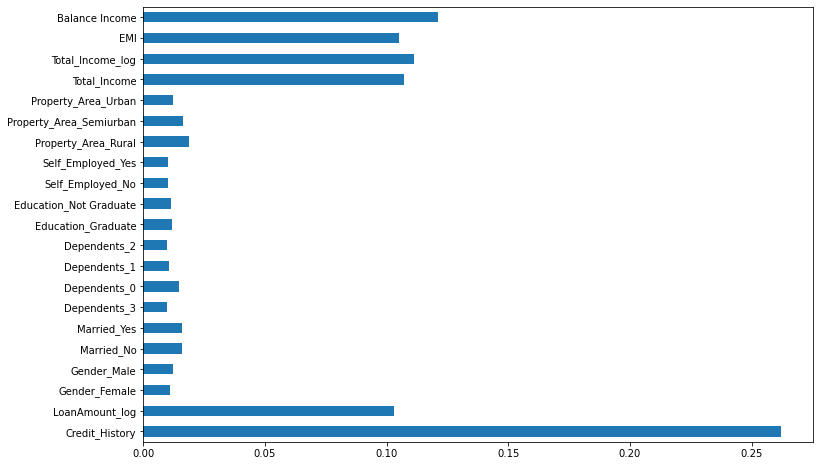

In [74]:
importances=pd.Series(RF_model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

In [76]:
import pickle
pickle.dump(LR_model,open('model.pkl','wb'))